In [1]:
import pysm3
import pysm3.units as u
import astropy.io.fits as fits

import healpy as hp
from fgbuster import (CMB, Dust, Synchrotron,
                      basic_comp_sep,
                      get_observation, get_noise_realization, get_instrument, get_sky)
from fgbuster.visualization import corner_norm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.append('/home/rguidetti')
from PolAngle import *
from beam import * 
from map import *
from convolution import * 
from beam_class import *
from PatchFunctions import *  # nuove funzioni in quanto quelle vecchie lavoravano con mappe NxN. Queste funzionano per mappe rettangolari Nx,Ny

## Variables 

In [2]:
nside    = 512 #64
pix_size =  6.641963465090936 #arcmin  #46.37906655953498

Nx = 100 #12
Ny = 75 #9


X_width = Nx * pix_size/60
Y_width = Ny * pix_size/60

# color map
c_min, c_max     = -10, 10      


print(f"Patch con {Nx} x {Ny} pixels, ognuno di {pix_size} arcmin, per una dimensione totale di {X_width:.2f} x {Y_width:.2f} gradi")

Patch con 100 x 75 pixels, ognuno di 6.641963465090936 arcmin, per una dimensione totale di 11.07 x 8.30 gradi


# Get the data

In [3]:
patch2d_I40 = fits.getdata("patch2d/patch2d_I40")
patch2d_Q40 = fits.getdata("patch2d/patch2d_Q40")
patch2d_U40 = fits.getdata("patch2d/patch2d_U40")

patch2d_I68 = fits.getdata("patch2d/patch2d_I68")
patch2d_Q68 = fits.getdata("patch2d/patch2d_Q68")
patch2d_U68 = fits.getdata("patch2d/patch2d_U68")

patch2d_I78 = fits.getdata("patch2d/patch2d_I78")
patch2d_Q78 = fits.getdata("patch2d/patch2d_Q78")
patch2d_U78 = fits.getdata("patch2d/patch2d_U78")

patch2d_I100 = fits.getdata("patch2d/patch2d_I100")
patch2d_Q100 = fits.getdata("patch2d/patch2d_Q100")
patch2d_U100 = fits.getdata("patch2d/patch2d_U100")

patch2d_I140 = fits.getdata("patch2d/patch2d_I140")
patch2d_Q140 = fits.getdata("patch2d/patch2d_Q140")
patch2d_U140 = fits.getdata("patch2d/patch2d_U140")

patch2d_I195 = fits.getdata("patch2d/patch2d_I195")
patch2d_Q195 = fits.getdata("patch2d/patch2d_Q195")
patch2d_U195 = fits.getdata("patch2d/patch2d_U195")

patch2d_I280 = fits.getdata("patch2d/patch2d_I280")
patch2d_Q280 = fits.getdata("patch2d/patch2d_Q280")
patch2d_U280 = fits.getdata("patch2d/patch2d_U280")

patch2d_I402 = fits.getdata("patch2d/patch2d_I402")
patch2d_Q402 = fits.getdata("patch2d/patch2d_Q402")
patch2d_U402 = fits.getdata("patch2d/patch2d_U402")

In [4]:
np.shape(patch2d_U402)

(75, 100)

# Beam

ellipticity =  -0.2


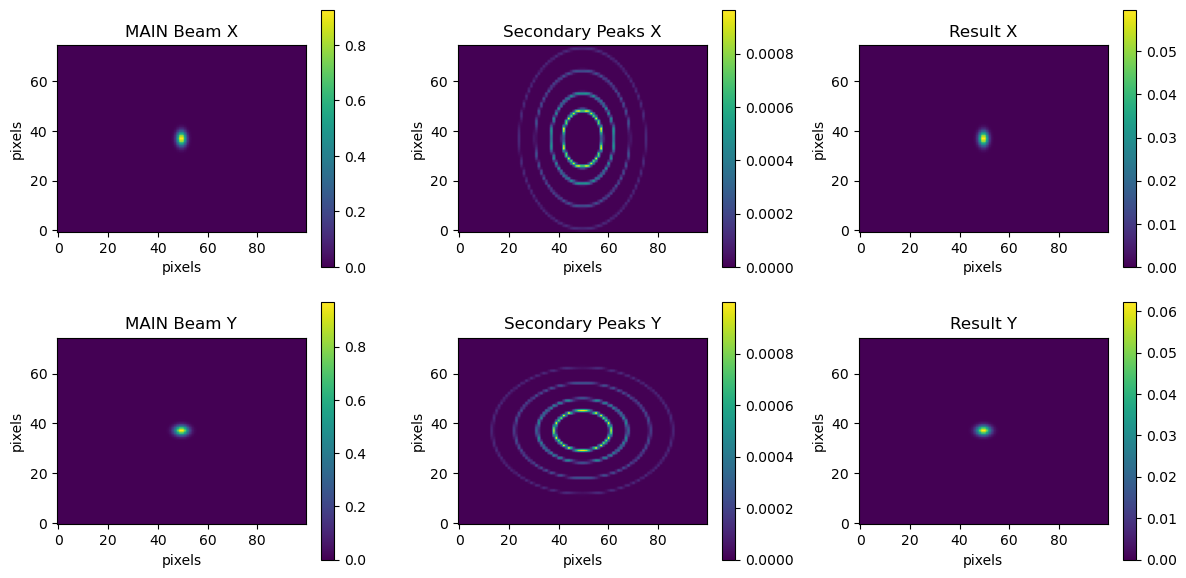

In [5]:
# COORDINATES LIKE THE ONES OF THE MAPS

Nx = int(Nx)
Ny = int(Ny)

onesx = np.ones(Nx)
onesy = np.ones(Ny)

indsx = (np.arange(Nx)+.5 - Nx/2.) * pix_size
indsy = (np.arange(Ny)+.5 - Ny/2.) * pix_size

#X = np.outer(onesy, indsx)
#Y = np.outer(indsy, onesx)
X = np.outer(onesy, indsx)
Y = np.outer(indsy, onesx)
R = np.sqrt(X**2. + Y**2.)


#####################################################################################

# VARIABLES

FWHM_x = 40  #degrees
FWHM_y = 60  #degrees
ellipticity = (FWHM_x - FWHM_y) / (FWHM_x + FWHM_y)
print("ellipticity = ", ellipticity)

array_dB = np.array([-20, -22, -24, -26]) #max values of the secondary peaks
array_dB = array_dB * 1.5
r1 = np.array([500, 800, 1200, 1600]) #angular distance of the peaks
r = 4 # width of the rings

theta = 0 # angle of rotation of the beam
a = 1 # major axis of ellipses 


#########################################################################################

# BEAM

beam_gauss_x, beam_gauss_y, sec_rings_x,sec_rings_y, beam_x, beam_y = create_beam_secpeaks(pix_size, FWHM_x, FWHM_y, theta, array_dB, r, r1, X, Y, a, ellipticity)

########################################################################################

# PLOT

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
titles = ['MAIN Beam X', 'Secondary Peaks X', 'Result X', 'MAIN Beam Y', 'Secondary Peaks Y', 'Result Y']
data_list = [beam_gauss_x, sec_rings_x, beam_x, beam_gauss_y, sec_rings_y, beam_y]

for i, ax in enumerate(axes.flat):
    im = ax.imshow(data_list[i], cmap='viridis', origin='lower')
    ax.set_title(titles[i])
    ax.set_xlabel('pixels')
    ax.set_ylabel('pixels')
    cbar = plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

beam max: 4.342923104481638e-05 beam min: 5.567625816923762
beam max: 4.342923104481638e-05 beam min: 5.527831268653144


0

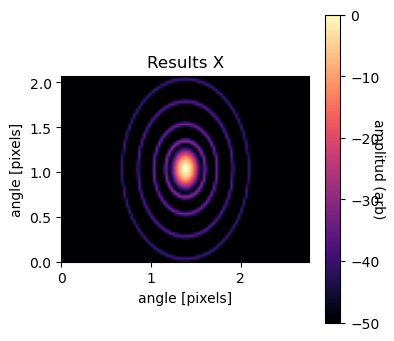

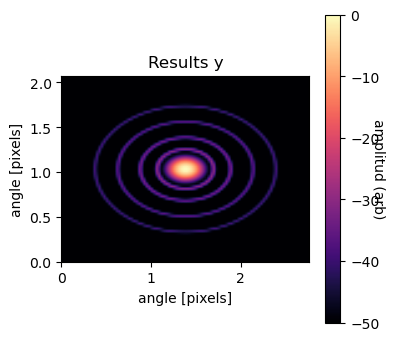

In [6]:
beam_to_plot = beam_x
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/4, Y_width/4, "Results X", "angle [pixels]")

beam_to_plot = beam_y
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/4, Y_width/4, "Results y", "angle [pixels]")

### Beam systematics

In [7]:
### beam systematics dictionary
bs = {"budy":{"A":1e-3,"FWHP":5.5,"R":100.,"psi":0.3,"polfracQ":0.5,"polfracU":0.01},  
                                                                         # little budy amplitude, 
                                                                         #FWHP, offset spacing, rotationa angle (radians)
                                                                        # pol_fraction for Q and U
     "ghostshelf": {"A":1e-4,"Diam":500.,"roll_off":7.},    #model of ghosting, amplitude (A), diameter (Diam) 
     "hex_crostalk":{"grid_space": 20.,"N":2,"neighbor_exp_fall":0.01}, 
                                                                               ## model of optical cross talk 
                                                                               ## to detectors on a hex grid
                                                                               ## assumed to be exponetial
                                                                               ## assumed to be 50% polarized
      "TtoQ":{"mono":1e-3,"dip_x":1e-2,"dip_y":1e-2,"quad_x":1e-2,"quad_45":1e-2},
      "TtoU":{"mono":1e-3,"dip_x":1e-2,"dip_y":1e-2,"quad_x":1e-2,"quad_45":1e-2},
                                                                  ## multiplole expansion leakage
      'psi':0.01*np.pi/180.
                                  ## detetor angle rotations
                   }

beam max: 4.342923104481638e-05 beam min: 3.8906439829901016
beam max: 4.342923104481638e-05 beam min: 3.8835185277290067
beam max: 4.342923104481638e-05 beam min: 3.8835185277290067
beam max: 4.342923104481638e-05 beam min: 6.10389469543774
beam max: 4.342923104481638e-05 beam min: 6.083891292178634


0

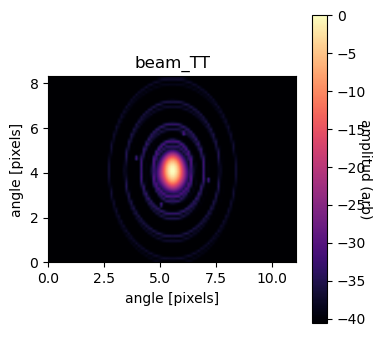

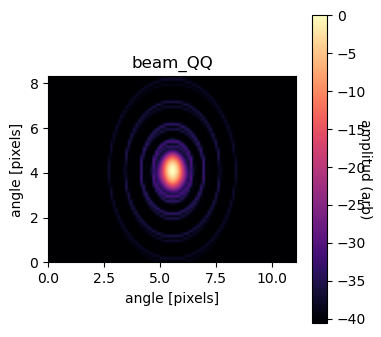

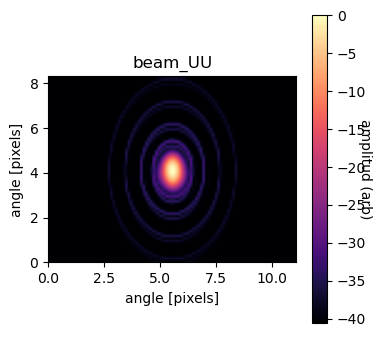

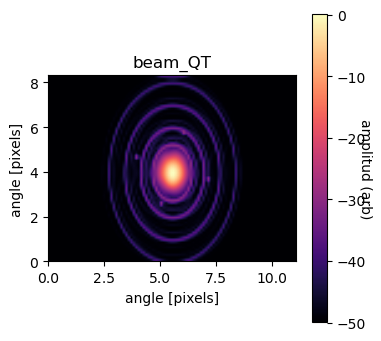

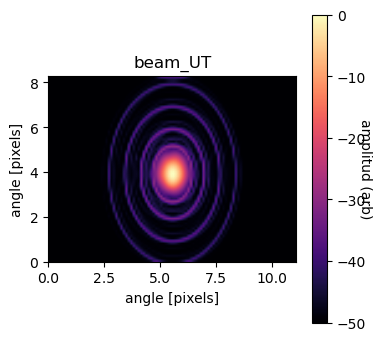

In [8]:
beam_sys = BeamSystematics()
beam_TT, beam_QQ, beam_UU, beam_QT, beam_UT, beam_QU, beam_UQ = make_systematics_beams_r(Nx, Ny, pix_size, FWHM_x, beam_x, bs)


######################################################################################################################################
beam_to_plot = beam_TT
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width, Y_width,  "beam_TT", 'angle [pixels]')

beam_to_plot = beam_QQ
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width, Y_width, "beam_QQ", 'angle [pixels]')
                                                            
beam_to_plot = beam_UU
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width, Y_width,"beam_UU", 'angle [pixels]')


beam_to_plot = beam_QT
if np.any(beam_to_plot <= 0):
    beam_to_plot[beam_to_plot <= 0] = 1e-21
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width, Y_width, "beam_QT", 'angle [pixels]')

beam_to_plot = beam_UT
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
if np.any(beam_to_plot <= 0):
    beam_to_plot[beam_to_plot <= 0] = 1e-21
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width, Y_width, "beam_UT", 'angle [pixels]')

In [9]:
# convolution with perfect beam
perf_beam, no1, no2, no3, no4, no5 = create_beam_secpeaks(pix_size, FWHM_x, FWHM_y, 0, array_dB, r, r1, X, Y, a, ellipticity)
perf_beam = perf_beam / np.sum(perf_beam)

Q_conv_perf_40 = convolve_map_with_beam(patch2d_Q40, perf_beam)
U_conv_perf_40 = convolve_map_with_beam(patch2d_U40, perf_beam)

Q_conv_perf_68 = convolve_map_with_beam(patch2d_Q68, perf_beam)
U_conv_perf_68 = convolve_map_with_beam(patch2d_U68, perf_beam)

Q_conv_perf_78 = convolve_map_with_beam(patch2d_Q78, perf_beam)
U_conv_perf_78 = convolve_map_with_beam(patch2d_U78, perf_beam)

Q_conv_perf_100 = convolve_map_with_beam(patch2d_Q100, perf_beam)
U_conv_perf_100 = convolve_map_with_beam(patch2d_U100, perf_beam)

Q_conv_perf_140 = convolve_map_with_beam(patch2d_Q140, perf_beam)
U_conv_perf_140 = convolve_map_with_beam(patch2d_U140, perf_beam)

Q_conv_perf_195 = convolve_map_with_beam(patch2d_Q195, perf_beam)
U_conv_perf_195 = convolve_map_with_beam(patch2d_U195, perf_beam)

Q_conv_perf_280 = convolve_map_with_beam(patch2d_Q280, perf_beam)
U_conv_perf_280 = convolve_map_with_beam(patch2d_U280, perf_beam)

Q_conv_perf_402 = convolve_map_with_beam(patch2d_Q402, perf_beam)
U_conv_perf_402 = convolve_map_with_beam(patch2d_U402, perf_beam)

# convolution with real beam
I_conv_real_40 = convolve_map_with_beam(patch2d_I40, beam_TT)
Q_conv_real_40 = convolve_map_with_beam(patch2d_Q40, beam_QQ)
U_conv_real_40 = convolve_map_with_beam(patch2d_U40, beam_UU)

I_conv_real_68 = convolve_map_with_beam(patch2d_I68, beam_TT)
Q_conv_real_68 = convolve_map_with_beam(patch2d_Q68, beam_QQ)
U_conv_real_68 = convolve_map_with_beam(patch2d_U68, beam_UU)

I_conv_real_78 = convolve_map_with_beam(patch2d_I78, beam_TT)
Q_conv_real_78 = convolve_map_with_beam(patch2d_Q78, beam_QQ)
U_conv_real_78 = convolve_map_with_beam(patch2d_U78, beam_UU)

I_conv_real_100 = convolve_map_with_beam(patch2d_I100, beam_TT)
Q_conv_real_100 = convolve_map_with_beam(patch2d_Q100, beam_QQ)
U_conv_real_100 = convolve_map_with_beam(patch2d_U100, beam_UU)

I_conv_real_140 = convolve_map_with_beam(patch2d_I140, beam_TT)
Q_conv_real_140 = convolve_map_with_beam(patch2d_Q140, beam_QQ)
U_conv_real_140 = convolve_map_with_beam(patch2d_U140, beam_UU)

I_conv_real_195 = convolve_map_with_beam(patch2d_I195, beam_TT)
Q_conv_real_195 = convolve_map_with_beam(patch2d_Q195, beam_QQ)
U_conv_real_195 = convolve_map_with_beam(patch2d_U195, beam_UU)

I_conv_real_280 = convolve_map_with_beam(patch2d_I280, beam_TT)
Q_conv_real_280 = convolve_map_with_beam(patch2d_Q280, beam_QQ)
U_conv_real_280 = convolve_map_with_beam(patch2d_U280, beam_UU)

I_conv_real_402 = convolve_map_with_beam(patch2d_I402, beam_TT)
Q_conv_real_402 = convolve_map_with_beam(patch2d_Q402, beam_QQ)
U_conv_real_402 = convolve_map_with_beam(patch2d_U402, beam_UU)

# Polarization Angle

In [10]:
std_deviation_degree = 1
std_deviation_rad    = std_deviation_degree * np.pi / 180
gauss_center  = 0

print(std_deviation_rad)

0.017453292519943295


**ho cambiato la funzione di apodizzazione perchè usciva male**

In [11]:
def cosine_window_r(Nx, Ny, x_range=None, y_range=None):
    "Generates a cosine window for apodizing within specified ranges to avoid edge effects in the 2D FFT"
    # Default ranges
    if x_range is None:
        x_range = [-np.pi / 2, np.pi / 2]
    if y_range is None:
        y_range = [-np.pi / 2, np.pi / 2]
    
    # Make a 2D coordinate system within specified ranges
    x_vals = np.linspace(x_range[0], x_range[1], Nx)
    y_vals = np.linspace(y_range[0], y_range[1], Ny)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Make a window map
    window_map = np.cos(X) * np.cos(Y)

    # Return the window map
    return window_map

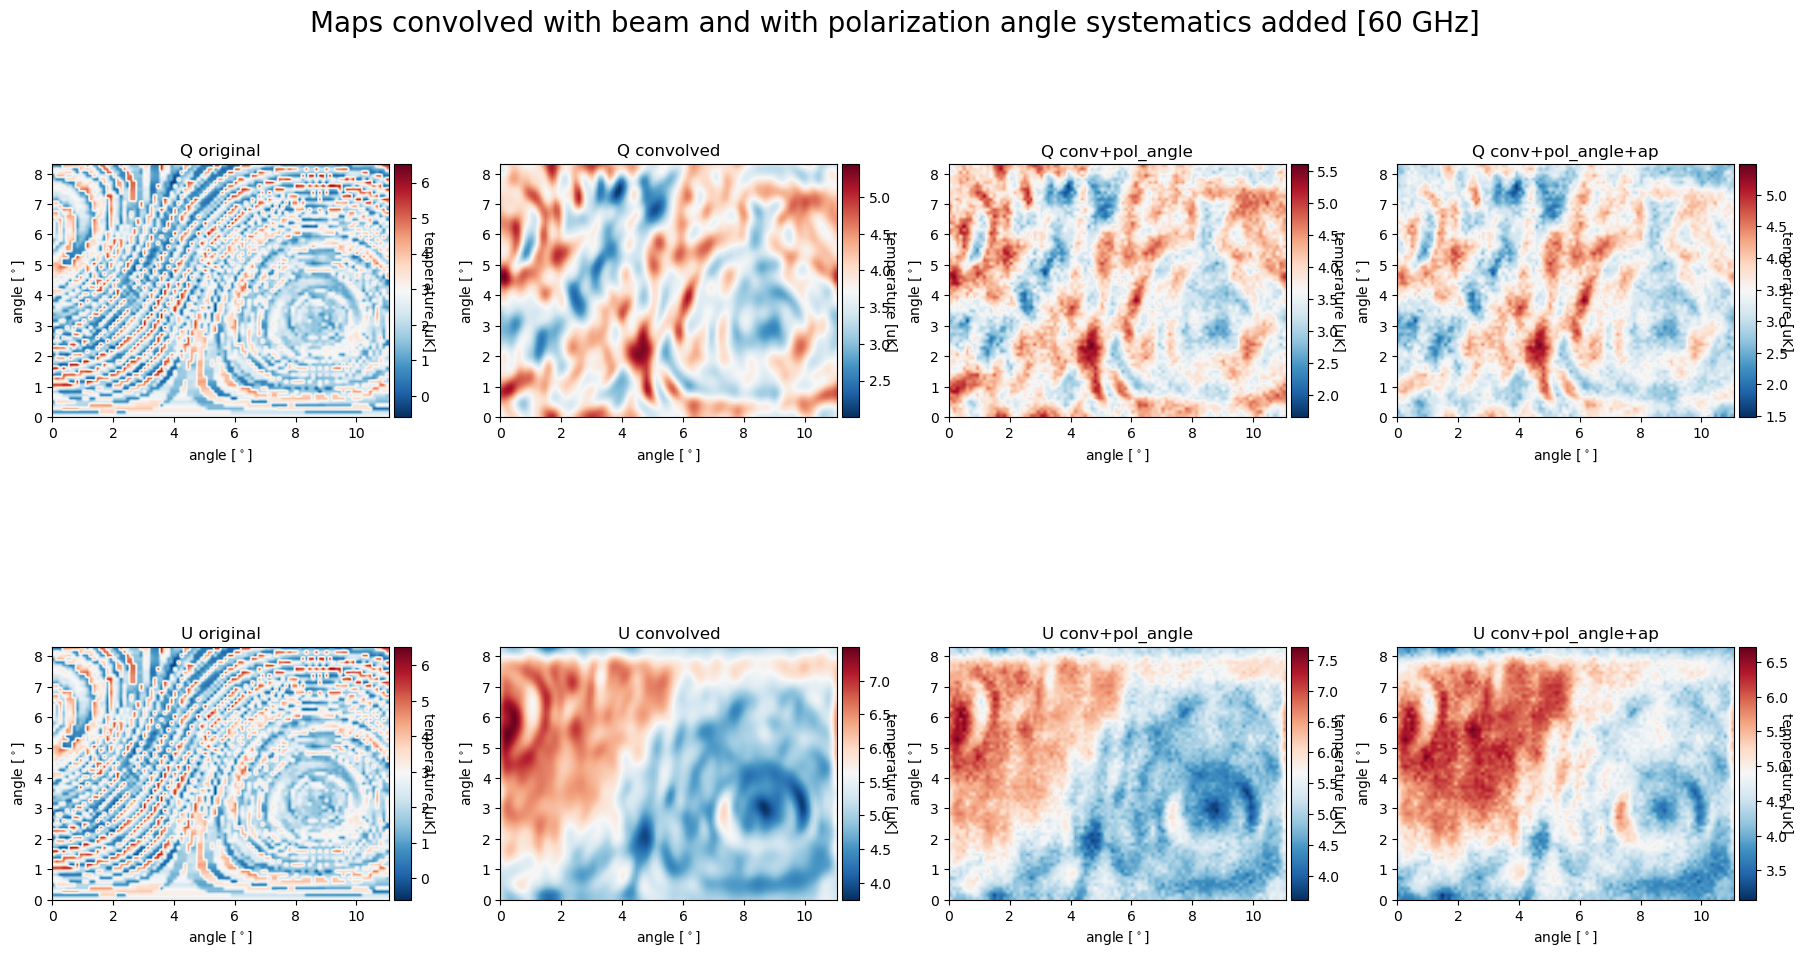

In [12]:
# POLARIZATION ANGLE
Q_pert40, U_pert40   = polangle_map(Q_conv_real_40, U_conv_real_40, gauss_center, std_deviation_rad)
Q_pert68, U_pert68   = polangle_map(Q_conv_real_68, U_conv_real_68, gauss_center, std_deviation_rad)
Q_pert78, U_pert78   = polangle_map(Q_conv_real_78, U_conv_real_78, gauss_center, std_deviation_rad)
Q_pert100, U_pert100 = polangle_map(Q_conv_real_100, U_conv_real_100, gauss_center, std_deviation_rad)
Q_pert140, U_pert140 = polangle_map(Q_conv_real_140, U_conv_real_140, gauss_center, std_deviation_rad)
Q_pert195, U_pert195 = polangle_map(Q_conv_real_195, U_conv_real_195, gauss_center, std_deviation_rad)
Q_pert280, U_pert280 = polangle_map(Q_conv_real_280, U_conv_real_280, gauss_center, std_deviation_rad)
Q_pert402, U_pert402 = polangle_map(Q_conv_real_402, U_conv_real_402, gauss_center, std_deviation_rad)


########################################################################################################

# APODIZATION
window = (cosine_window_r(Nx, Ny, x_range=[-np.pi / 6, np.pi / 6], y_range=[-np.pi / 6, np.pi / 6]))

Q_ap40 = window * Q_pert40
U_ap40 = window * U_pert40
I_ap40 = window * I_conv_real_40

Q_ap68 = window * Q_pert68
U_ap68 = window * U_pert68
I_ap68 = window * I_conv_real_68

Q_ap78 = window * Q_pert78
U_ap78 = window * U_pert78
I_ap78 = window * I_conv_real_78

Q_ap100 = window * Q_pert100
U_ap100 = window * U_pert100
I_ap100 = window * I_conv_real_100

Q_ap140 = window * Q_pert140
U_ap140 = window * U_pert140
I_ap140 = window * I_conv_real_140

Q_ap195 = window * Q_pert195
U_ap195 = window * U_pert195
I_ap195 = window * I_conv_real_195

Q_ap280 = window * Q_pert280
U_ap280 = window * U_pert280
I_ap280 = window * I_conv_real_280

Q_ap402 = window * Q_pert402
U_ap402 = window * U_pert402
I_ap402 = window * I_conv_real_402

########################################################################################################

# plot
Map_to_Plot = [patch2d_Q40, Q_conv_real_40,Q_pert40,Q_ap40, patch2d_Q40, U_conv_real_40 ,U_pert40, U_ap40]
title = ["Q original","Q convolved","Q conv+pol_angle", "Q conv+pol_angle+ap", "U original","U convolved", "U conv+pol_angle", "U conv+pol_angle+ap"]
c_factor_max = [np.max(Map_to_Plot[0]), np.max(Map_to_Plot[1]), np.max(Map_to_Plot[2]), np.max(Map_to_Plot[3]), np.max(Map_to_Plot[4]), np.max(Map_to_Plot[5]), np.max(Map_to_Plot[6]), np.max(Map_to_Plot[7])]
c_factor_min = [np.min(Map_to_Plot[0]), np.min(Map_to_Plot[1]), np.min(Map_to_Plot[2]), np.min(Map_to_Plot[3]), np.min(Map_to_Plot[4]), np.min(Map_to_Plot[5]), np.min(Map_to_Plot[6]), np.min(Map_to_Plot[7])]

fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs      = axs.flatten()
for i, (map_data, c_factor_iter_min, c_factor_iter_max) in enumerate(zip(Map_to_Plot, c_factor_min, c_factor_max)):
        Plot_CMB_Map_compact(axs[i], map_data, c_factor_iter_min, c_factor_iter_max, X_width, Y_width)
        axs[i].set_title(title[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.90)
plt.suptitle('Maps convolved with beam and with polarization angle systematics added [60 GHz]', fontsize=20)
#plt.savefig('/Users/guide/Documents/University/TESI/immagini/FullModelPerturbation.png')
plt.show()


# Component separation

### Conversione in 1d
I è stata convoluta e deconvoluta con il beam (no angolo di polarizzazione). Non so se è giusto ma serve anche I per ricreare un array fgbuster del tipo (3, n_pix) e fare la component separation. 

In [13]:

I_flat40 = I_ap40.flatten()
Q_flat40 = Q_ap40.flatten()
U_flat40 = U_ap40.flatten()

I_flat68 = I_ap68.flatten()
Q_flat68 = Q_ap68.flatten()
U_flat68 = U_ap68.flatten()

I_flat78 = I_ap78.flatten()
Q_flat78 = Q_ap78.flatten()
U_flat78 = U_ap78.flatten()

I_flat100 = I_ap100.flatten()
Q_flat100 = Q_ap100.flatten()
U_flat100 = U_ap100.flatten()

I_flat140 = I_ap140.flatten()
Q_flat140 = Q_ap140.flatten()
U_flat140 = U_ap140.flatten()

I_flat195 = I_ap195.flatten()
Q_flat195 = Q_ap195.flatten()
U_flat195 = U_ap195.flatten()

I_flat280 = I_ap280.flatten()
Q_flat280 = Q_ap280.flatten()
U_flat280 = U_ap280.flatten()

I_flat402 = I_ap402.flatten()
Q_flat402 = Q_ap402.flatten()
U_flat402 = U_ap402.flatten()

In [14]:
# devo ritornare ad avere elementi del tipo (6, 3, n_pix)

freq40 = np.stack([I_flat40, Q_flat40, U_flat40])
freq68 = np.stack([I_flat68, Q_flat68, U_flat68])
freq78 = np.stack([I_flat78, Q_flat78, U_flat78])
freq100 = np.stack([I_flat100, Q_flat100, U_flat100])
freq140 = np.stack([I_flat140, Q_flat140, U_flat140])
freq195 = np.stack([I_flat195, Q_flat195, U_flat195])
freq280 = np.stack([I_flat280, Q_flat280, U_flat280])
freq402 = np.stack([I_flat402, Q_flat402, U_flat402])

full_array = np.array([freq40, freq68, freq78, freq100, freq140, freq195, freq280, freq402])
np.shape(full_array)

(8, 3, 7500)

### Instrument

In [15]:
instrument = get_instrument('LiteBIRD')

df   = pd.DataFrame(instrument)
freq = df.iloc[[0, 3, 4, 6, 8, 10, 12, 14], :]   #estraggo le frequenze che ho selezionato creando le patch

freq

frequency  depth_p  depth_i  fwhm  f_sky    status  \
0        40.0    37.42    26.46  70.5    1.0  forecast   
3        68.0    16.87    11.93  47.1    1.0  forecast   
4        78.0    12.07     8.53  43.8    1.0  forecast   
6       100.0     6.56     4.64  37.8    1.0  forecast   
8       140.0     4.79     3.39  30.8    1.0  forecast   
10      195.0     5.85     4.14  28.6    1.0  forecast   
12      280.0    13.80     9.76  22.5    1.0  forecast   
14      402.0    47.45    33.55  17.9    1.0  forecast   

                     reference       type  \
0   arXiv:2202.02773, Table 13  satellite   
3   arXiv:2202.02773, Table 13  satellite   
4   arXiv:2202.02773, Table 13  satellite   
6   arXiv:2202.02773, Table 13  satellite   
8   arXiv:2202.02773, Table 13  satellite   
10  arXiv:2202.02773, Table 13  satellite   
12  arXiv:2202.02773, Table 13  satellite   
14  arXiv:2202.02773, Table 13  satellite   

                                                 note experiment  
0   Different instruments at the same freq were co...   LiteBIRD  
3   Different instruments at the same freq were co...   LiteBIRD  
4   Different instruments at the same freq were co...   LiteBIRD  
6   Different instruments at the same freq were co...   LiteBIRD  
8   Different instruments at the same freq were co...   LiteBIRD  
10  Different instruments at the same freq were co...   LiteBIRD  
12  Different instruments at the same freq were co...   LiteBIRD  
14  Different instruments at the same freq were co...   LiteBIRD

# Separation

In [16]:
components = [CMB(), Dust(350.), Synchrotron(20.)]

# component separation
result = basic_comp_sep(components, freq, full_array)

print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.53132285 24.46306226 -3.01643376]


In [17]:
np.shape(result.s)
# sono 3 mappe I, Q e U per cmb, dust e sync. ma non so quali
# credo siano nello stesso ordine dell'input, quindi I, Q, U ma in un esempio chiama result.s[0,0] come Q della cmb, ma dovrebbe essere la I...

(3, 3, 7500)

In [18]:
cmb_I  = result.s[0,0]
cmb_Q  = result.s[0,1]
cmb_U  = result.s[0,2]

In [19]:
fits.writeto("cmb_I", cmb_I, overwrite=True)
fits.writeto("cmb_Q", cmb_Q, overwrite=True)
fits.writeto("cmb_U", cmb_U, overwrite=True)

In [20]:
cmb_I = fits.getdata("cmb_I")
cmb_Q = fits.getdata("cmb_Q")
cmb_U = fits.getdata("cmb_U")

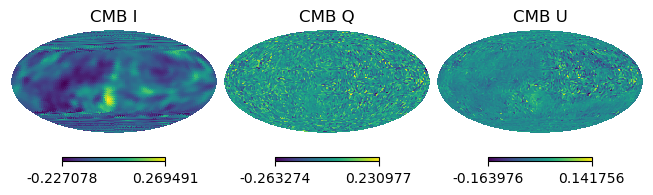

In [21]:
hp.mollview(cmb_I, title='CMB I', sub=(1, 3, 1))
hp.mollview(cmb_Q, title='CMB Q', sub=(1, 3, 2))
hp.mollview(cmb_U, title='CMB U', sub=(1, 3, 3))

### Trasformo in 2d

Le mappe sono tornate 1D, quindi devo di nuovo trasformale in 2D. A questo punto saranno con un numero di pizel un po' più piccolo e "sbagliato" ma non dovendo usare più healpy posso lasciarle così

In [22]:
x = 75*2 #9*2 
#x = np.sqrt(len(cmb_I)*2)
int(x)

150

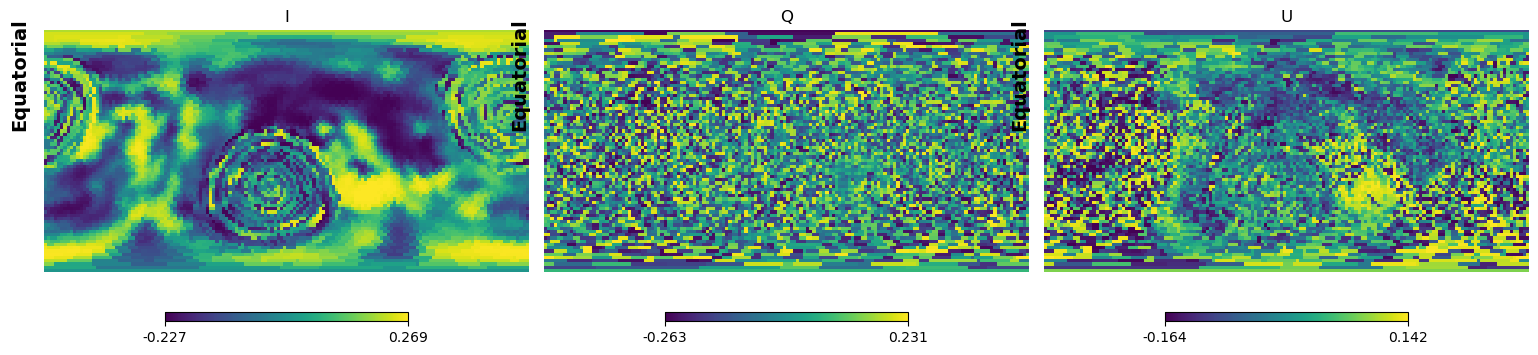

In [23]:
plt.figure(figsize=(15, 5))
cmb_I_2d = hp.cartview(cmb_I, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="I", sub=(1, 3, 1))
cmb_Q_2d = hp.cartview(cmb_Q, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="Q", sub=(1, 3, 2))
cmb_U_2d = hp.cartview(cmb_U, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="U", sub=(1, 3, 3))


In [24]:
np.shape(cmb_I_2d)

(75, 150)

In [25]:
cmb_I_2d = cmb_I_2d[:75, :100]
cmb_Q_2d = cmb_Q_2d[:75, :100]
cmb_U_2d = cmb_U_2d[:75, :100]

In [26]:
np.shape(cmb_I_2d)

(75, 100)

# Deconvolution
**ho cambiato la funzione di deconvoluzione perchè correct_lr_r la mappa in input e quella in output uscivano uguali**

In [27]:
# ho cambiato la funzione di deconvoluzione perchè correct_lr_r non funziona, la mappa in input e quella in output sono uguali
#I_deconv = correct_lr_r(cmb_I_2d, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 100)
#Q_deconv = correct_lr_r(cmb_Q_2d, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)
#U_deconv = correct_lr_r(cmb_U_2d, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

I_deconv = deconvolve_map(cmb_I_2d, beam_x, perf_beam)
Q_deconv = deconvolve_map(cmb_Q_2d, beam_x, perf_beam)
U_deconv = deconvolve_map(cmb_U_2d, beam_x, perf_beam)


In [28]:
# convoluzione con beam perfetto
I_conv_perf = convolve_map_with_beam(cmb_I_2d, perf_beam)
Q_conv_perf = convolve_map_with_beam(cmb_Q_2d, perf_beam)
U_conv_perf = convolve_map_with_beam(cmb_U_2d, perf_beam)

# DIFFERENCE
Q_diff = (Q_conv_perf- Q_deconv)
U_diff = (U_conv_perf- U_deconv)

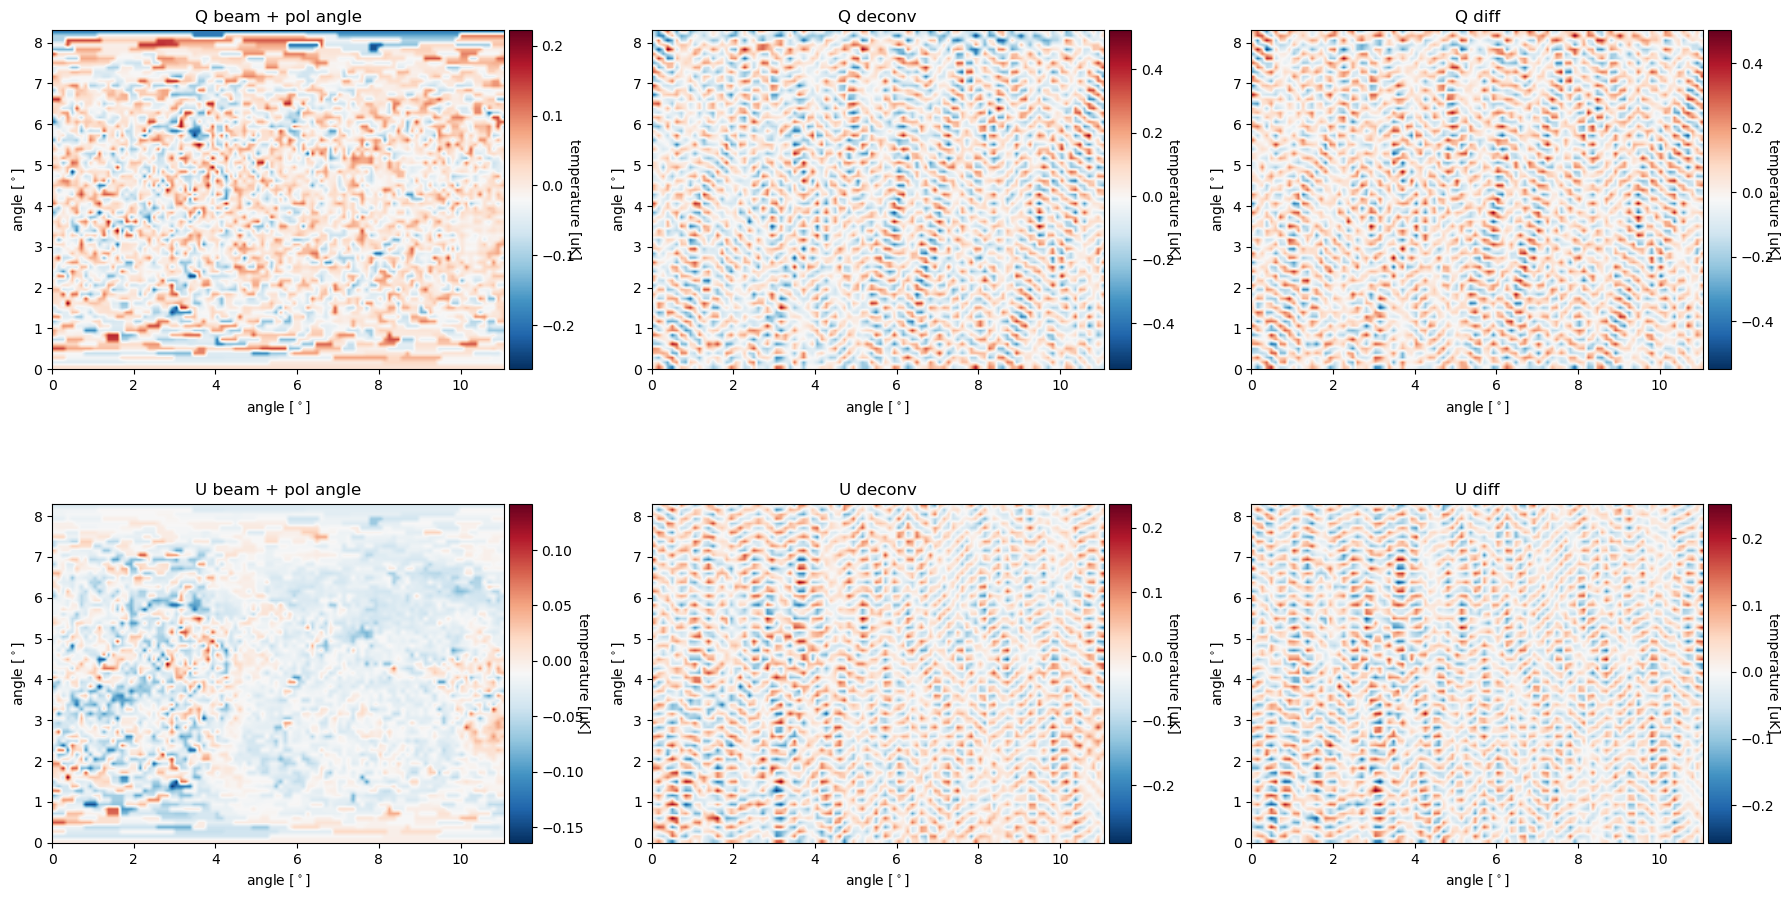

In [29]:
Map_to_Plot = [cmb_Q_2d ,Q_deconv, Q_diff, cmb_U_2d ,U_deconv, U_diff]
title = ["Q beam + pol angle", "Q deconv", "Q diff", "U beam + pol angle", "U deconv", "U diff"]
c_factor_max = [np.max(Map_to_Plot[0]), np.max(Map_to_Plot[1]), np.max(Map_to_Plot[2]), np.max(Map_to_Plot[3]), np.max(Map_to_Plot[4]), np.max(Map_to_Plot[5])]
c_factor_min = [np.min(Map_to_Plot[0]), np.min(Map_to_Plot[1]), np.min(Map_to_Plot[2]), np.min(Map_to_Plot[3]), np.min(Map_to_Plot[4]), np.min(Map_to_Plot[5])]



fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs      = axs.flatten()
for i, (map_data, c_factor_iter_min, c_factor_iter_max) in enumerate(zip(Map_to_Plot, c_factor_min, c_factor_max)):
        Plot_CMB_Map_compact(axs[i], map_data, c_factor_iter_min, c_factor_iter_max, X_width, Y_width)
        axs[i].set_title(title[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.90)
#plt.suptitle('Maps convolved with beam and with polarization angle systematics added', fontsize=20)
plt.show()


# Power spectra with NaMaster
**con nside = 64 di partenza, trovo solo 3 punti nel power spectrum e poi sono tutti 0, quindi non si vede bene l'andamento**

In [30]:
import pymaster as nmt

In [31]:
pix_size_rad = np.radians(pix_size /60)

X_width_rad = Nx * pix_size_rad
Y_width_rad = Ny * pix_size_rad


# Masks:
mask = np.ones_like(Q_deconv)

# Fields:
f0 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [I_deconv])
f2 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_deconv, U_deconv], purify_b=True)

# Bins:
l0_bins = np.arange(Nx) * 8 * np.pi/X_width_rad
lf_bins = (np.arange(Nx)+1) * 8 * np.pi/X_width_rad
b = nmt.NmtBinFlat(l0_bins, lf_bins)

# The effective sampling rate for these bandpowers can be obtained calling:
ells_uncoupled = b.get_effective_ells()

In [32]:
# workspace
w00 = nmt.NmtWorkspaceFlat()
w02 = nmt.NmtWorkspaceFlat()
w22 = nmt.NmtWorkspaceFlat()

w00.read_from("w00_flat.fits")
w02.read_from("w02_flat.fits")
w22.read_from("w22_flat.fits")

In [33]:
'''
w00.compute_coupling_matrix(f0, f0, b)
w02.compute_coupling_matrix(f0, f2, b)
w22.compute_coupling_matrix(f2, f2, b)

w00.write_to("w00_flat.fits")
w02.write_to("w02_flat.fits")
w22.write_to("w22_flat.fits")
'''

**non riesco a calcolare i cl uncoupled, il kernel si interrompe e riparte. Prima non avevo questo problema**

In [ ]:
# Computing power spectra:

cl00_coupled = nmt.compute_coupled_cell_flat(f0, f0, b)
#cl00_uncoupled = w00.decouple_cell(cl00_coupled)
cl02_coupled = nmt.compute_coupled_cell_flat(f0, f2, b)
#cl02_uncoupled = w02.decouple_cell(cl02_coupled)
cl22_coupled = nmt.compute_coupled_cell_flat(f2, f2, b)
#cl22_uncoupled = w22.decouple_cell(cl22_coupled)

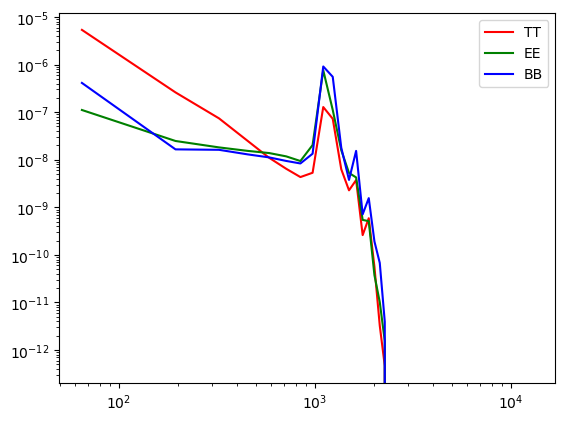

In [36]:
plt.figure()
#plt.plot(l, cl_tt, 'r-', label='Input TT')
#plt.plot(l, cl_ee, 'g-', label='Input EE')
#plt.plot(l, cl_bb, 'b-', label='Input BB')
plt.plot(ells_uncoupled, cl00_coupled[0], 'r', label='TT')
plt.plot(ells_uncoupled, cl22_coupled[0], 'g', label='EE')
plt.plot(ells_uncoupled, cl22_coupled[3], 'b', label='BB')
plt.loglog()
plt.legend()
plt.show()

## CAMB Power Spectrum
Trovo r con fgb e creo i power spectra con CAMB usando quell'r 

In [37]:
nside_patch = 25 #3

In [38]:
np.shape(full_array)

(8, 3, 7500)

fsky =  1.0
======= ESTIMATION OF SPECTRAL PARAMETERS =======
res.x =  [ 1.52855641 25.19307006 -3.02886366]
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
bounds on r =  0.028636097185081158  /  0.02998844231231028
starting point =  0.029304469769721415
    ===>> fitted r =  [0.02917619]
======= ESTIMATION OF SIGMA(R) =======
ind_sr_min =  0
sr_grid[ind_sr_min-1] =  [1.]
sr_grid[ind_sr_min+1] =  [0.03380537]
sr_grid =  [[0.02917619]
 [0.03380537]
 [0.03916903]
 [0.04538371]
 [0.05258442]
 [0.06092762]
 [0.07059459]
 [0.08179533]
 [0.09477323]
 [0.10981024]
 [0.12723306]
 [0.14742024]
 [0.17081038]
 [0.19791167]
 [0.22931293]
 [0.26569642]
 [0.30785261]
 [0.35669743]
 [0.41329212]
 [0.4788663 ]
 [0.55484467]
 [0.642878  ]
 [0.74487896]
 [0.86306371]
 [1.        ]]
case # 1
bounds on sigma(r) =  [0.02917619]  /  [0.03380537]
starting point =  [0

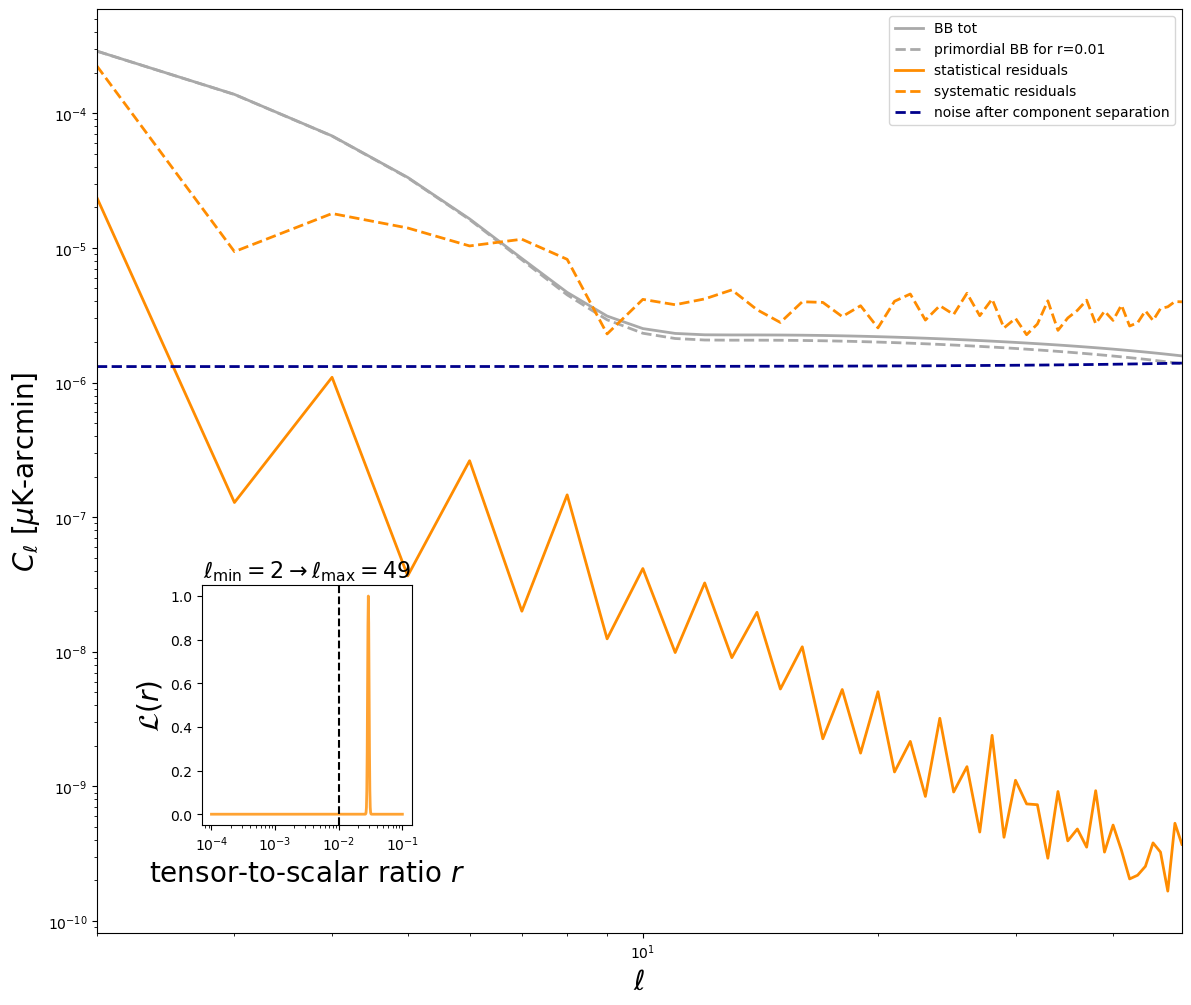

In [39]:
from fgbuster import xForecast, CMB, Dust, Synchrotron
res = xForecast(components, freq, full_array, 2, 2*nside_patch-1, Alens=0.1, r=0.01, make_figure=True)

Trovo spettro originale con CAMB per quel r

(2551, 4)


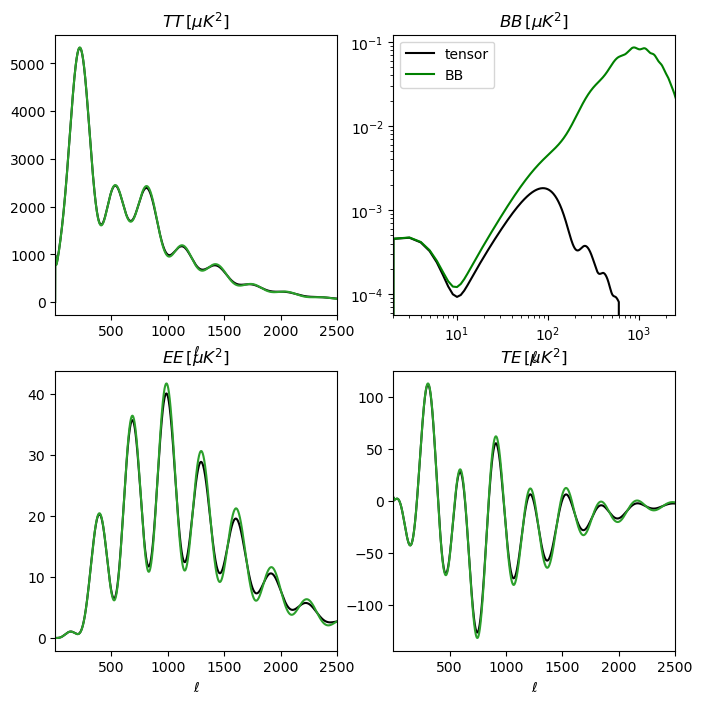

In [41]:
r = 0.02917619

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=r)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
pars.WantTensors= True

results = camb.get_results(pars)

powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
#for name in powers: print(name)


#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']
tensor = powers['tensor']
print(totCL.shape)

ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (8,8))

# TT
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='C2')
ax[0,0].set_title(r'$TT\, [\mu K^2]$')

#EE
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='C2')
ax[1,0].set_title(r'$EE\, [\mu K^2]$')

#BB
ax[0,1].loglog(ls,tensor[:,2], color='k', label="tensor")
ax[0,1].loglog(ls,totCL[:,2], color='g', label="BB")
ax[0,1].set_title(r'$BB\, [\mu K^2]$')
ax[0,1].legend()

# TE
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='C2')
ax[1,1].set_title(r'$TE\, [\mu K^2]$')

for ax in ax.reshape(-1): 
    ax.set_xlim([2,2500])
    ax.set_xlabel(r'$\ell$')

Confronto

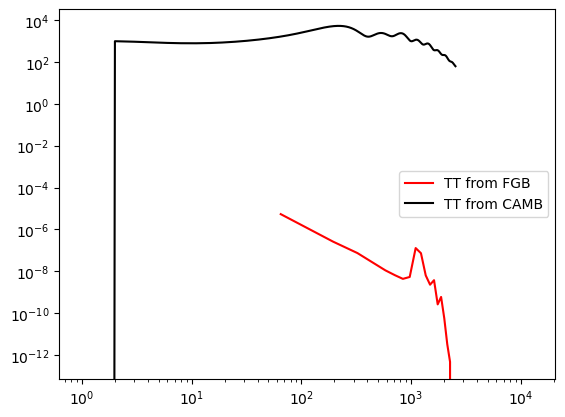

In [42]:
plt.figure()
plt.plot(ells_uncoupled, cl00_coupled[0], 'r', label='TT from FGB')
plt.plot(ls,totCL[:,0], color='k', label='TT from CAMB')
plt.loglog()
plt.legend()
plt.show()

## Spettro della patch originale

Voglio trovare lo spettro della patch originale (ovvero prima di applicare beam e tutto il resto), ma prima devo rifare la component separation per trasformare le patch a diversa frequenza in un'unica patch che contenga solo cmb

In [43]:
I_2dflat40 = patch2d_I40.flatten()
Q_2dflat40 = patch2d_I40.flatten()
U_2dflat40 = patch2d_I40.flatten()
I_2dflat68 = patch2d_I68.flatten()
Q_2dflat68 = patch2d_I68.flatten()
U_2dflat68 = patch2d_I68.flatten()
I_2dflat78 = patch2d_I78.flatten()
Q_2dflat78 = patch2d_I78.flatten()
U_2dflat78 = patch2d_I78.flatten()
I_2dflat100 = patch2d_I100.flatten()
Q_2dflat100 = patch2d_I100.flatten()
U_2dflat100 = patch2d_I100.flatten()
I_2dflat140 = patch2d_I140.flatten()
Q_2dflat140 = patch2d_I140.flatten()
U_2dflat140 = patch2d_I140.flatten()
I_2dflat195 = patch2d_I195.flatten()
Q_2dflat195 = patch2d_I195.flatten()
U_2dflat195 = patch2d_I195.flatten()
I_2dflat280 = patch2d_I280.flatten()
Q_2dflat280 = patch2d_I280.flatten()
U_2dflat280 = patch2d_I280.flatten()
I_2dflat402 = patch2d_I402.flatten()
Q_2dflat402 = patch2d_I402.flatten()
U_2dflat402 = patch2d_I402.flatten()

freq40_2d = np.stack([I_2dflat40, Q_2dflat40, U_2dflat40])
freq68_2d = np.stack([I_2dflat68, Q_2dflat68, U_2dflat68])
freq78_2d = np.stack([I_2dflat78, Q_2dflat78, U_2dflat78])
freq100_2d = np.stack([I_2dflat100, Q_2dflat100, U_2dflat100])
freq140_2d = np.stack([I_2dflat140, Q_2dflat140, U_2dflat140])
freq195_2d = np.stack([I_2dflat195, Q_2dflat195, U_2dflat195])
freq280_2d = np.stack([I_2dflat280, Q_2dflat280, U_2dflat280])
freq402_2d = np.stack([I_2dflat402, Q_2dflat402, U_2dflat402])

full_array_2d = np.array([freq40_2d, freq68_2d, freq78_2d, freq100_2d, freq140_2d, freq195_2d, freq280_2d, freq402_2d])
np.shape(full_array_2d)

(8, 3, 7500)

In [44]:
result_original = basic_comp_sep(components, freq, full_array_2d)

cmb_I_original  = result_original.s[0,0]
cmb_Q_original  = result_original.s[0,1]
cmb_U_original  = result_original.s[0,2]

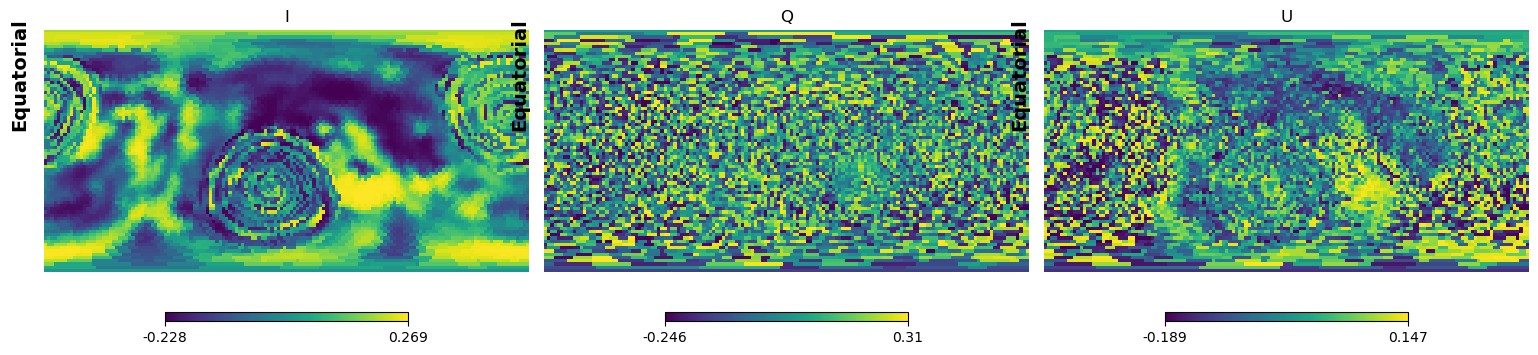

In [45]:
plt.figure(figsize=(15, 5))
cmb_I_original_2d = hp.cartview(cmb_I, coord=['G','C'], return_projected_map=True, xsize=150,norm='hist', title="I", sub=(1, 3, 1))
cmb_Q_original_2d = hp.cartview(cmb_Q, coord=['G','C'], return_projected_map=True, xsize=150,norm='hist', title="Q", sub=(1, 3, 2))
cmb_U_original_2d = hp.cartview(cmb_U, coord=['G','C'], return_projected_map=True, xsize=150,norm='hist', title="U", sub=(1, 3, 3))


cmb_I_original_2d = cmb_I_original_2d[:75, :100]
cmb_Q_original_2d = cmb_Q_original_2d[:75, :100]
cmb_U_original_2d = cmb_U_original_2d[:75, :100]

Ora posso trovare lo spettro

In [46]:
mask_or = np.ones_like(np.array(cmb_I_original_2d))

f0_or = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask_or, [np.array(cmb_I_original_2d)])
f2_or = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask_or, [np.array(cmb_Q_original_2d), np.array(cmb_U_original_2d)], purify_b=True)

In [47]:
w00_or = nmt.NmtWorkspaceFlat()
w02_or = nmt.NmtWorkspaceFlat()
w22_or = nmt.NmtWorkspaceFlat()

w00_or.compute_coupling_matrix(f0_or, f0_or, b)
w02_or.compute_coupling_matrix(f0_or, f2_or, b)
w22_or.compute_coupling_matrix(f2_or, f2_or, b)

w00_or.write_to("w00_flat_or.fits")
w02_or.write_to("w02_flat_or.fits")
w22_or.write_to("w22_flat_or.fits")

In [48]:
cl00_coupled_or = nmt.compute_coupled_cell_flat(f0_or, f0_or, b)
#cl00_uncoupled_or = w00_or.decouple_cell(cl00_coupled_or)
cl02_coupled_or = nmt.compute_coupled_cell_flat(f0_or, f2_or, b)
#cl02_uncoupled_or = w02_or.decouple_cell(cl02_coupled_or)
cl22_coupled_or = nmt.compute_coupled_cell_flat(f2_or, f2_or, b)
#cl22_uncoupled_or = w22_or.decouple_cell(cl22_coupled_or)

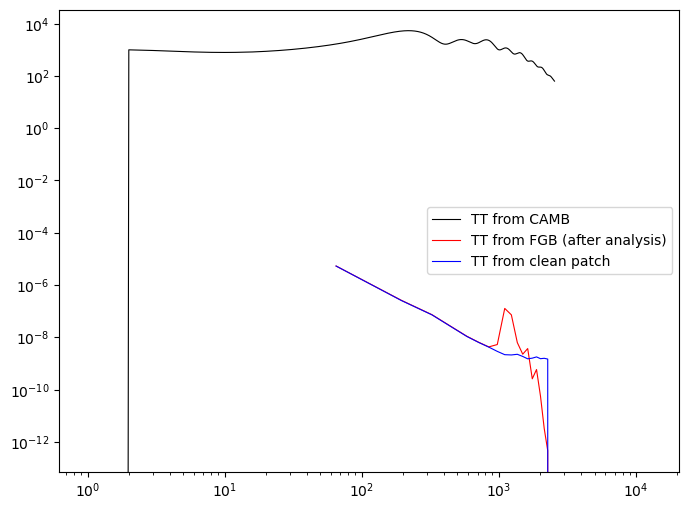

In [49]:
plt.figure(figsize=(8,6))
plt.plot(ls,totCL[:,0], color='black', label='TT from CAMB', linewidth=0.8)
plt.plot(ells_uncoupled, cl00_coupled[0], 'r', label='TT from FGB (after analysis)', linewidth=0.8)
plt.plot(ells_uncoupled, cl00_coupled_or[0], 'b', label='TT from clean patch', linewidth=0.8)
plt.loglog()
plt.legend()
plt.show()

Così confronto lo spettro ideale trovato con CAMB con r trovato da fgb, lo spettro della patch (di cmb) iniziale e lo spettro della patch (di cmb) dopo beam + ang pol+ deconv